In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler

seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 2
    batch_size = 32
    test_size = 0.2 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    dirPath = "/home/rosario/explainable/Bachelor/"# root
    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr =0.1 # 0.001 slowed learningrate

    # load data
  
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size , droplist= droplist)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.BreastCancerUCI(batch_size= batch_size, droplist=droplist, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    grads =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)

    import eval
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    eval.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    print(dirPath)
    print(modelsDirPath)

calculating on: cuda:0
train:shuffel = False
eval:shuffel = False
Epoch: 0
      Training_acc: 0.6530944625407166
-------------------

Epoch: 1
      Training_acc: 0.6530944625407166
-------------------

NOTE: THESE SAVED MODELS ARE BEEING OVERWRITTEN ON NEXT RUN
evaluating ...
Progess: 47.50%
test acc: 64.29%
test Loss: 0.67
-------------------
Progess: 97.50%
test acc: 64.29%
test Loss: 0.66
-------------------
/home/rosario/explainable/Bachelor/
/home/rosario/explainable/Bachelor/Models


plotting...


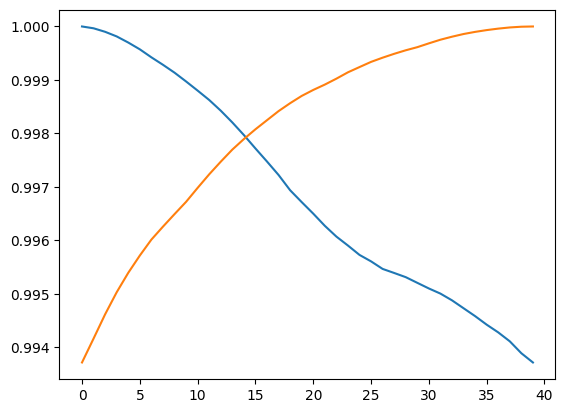

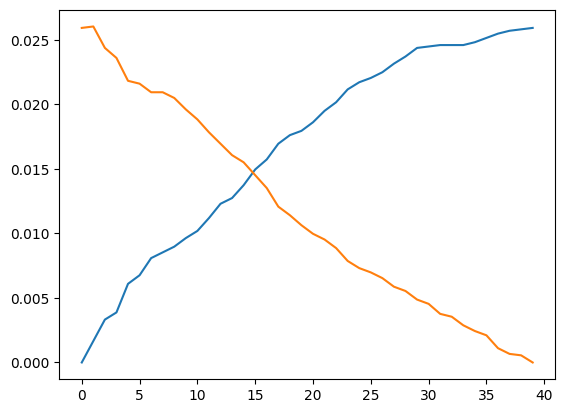

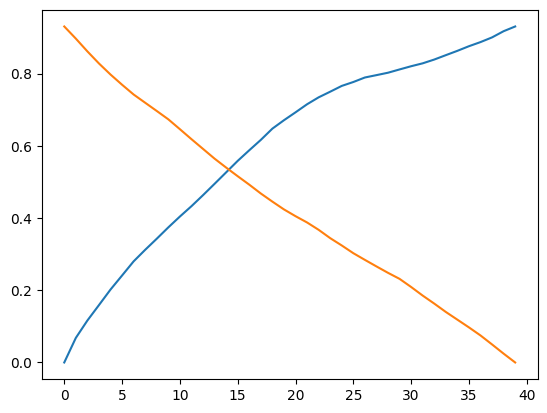

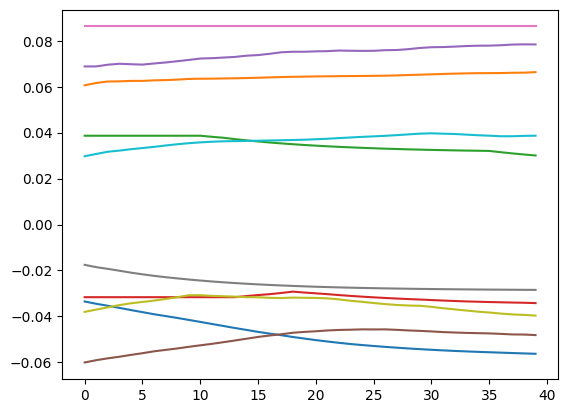

plotting: GM GradientMagnitude averaged over features


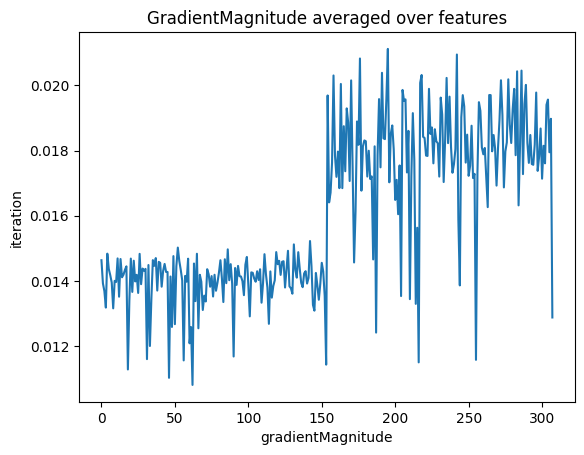

plotting: GM GradientMagnitude PerFeature


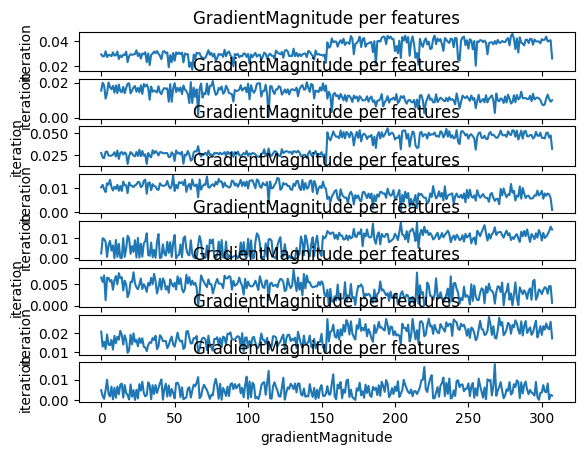

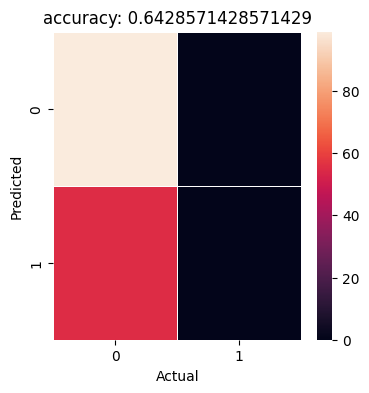

In [2]:
dataPath= dirPath+ "Trainingresults/"
print("plotting...")
import utils 
import numpy as np

#unpackedGradiends = utils.unpackingGradients(inputFeatures, grads)
#averagedGradientMagnitude = np.average(np.absolute(unpackedGradiends), axis=0) 
#gradientMagnitudePerFeature = np.absolute(unpackedGradiends)
#utils.appendToNPZ(dirPath+ "data.npz", "test" + "GradientsPerFeature", unpackedGradiends)
#utils.appendToNPZ(dirPath+ "data.npz", "test" + "GradientMagnitudePerFeature", gradientMagnitudePerFeature)
#utils.appendToNPZ(dirPath+ "data.npz", "test" + "AveragedGradientMagnitude", averagedGradientMagnitude)
#plotResults.plotCosineSimilarity(dirPath, "cosine_simialarity", set="train")
#plotResults.plotCosineSimilarity(dirPath, "cosine_simialarity", set="eval")
plotResults.plotCosineSimilarity(dataPath, "cosine_simialarity", set="test")
plt.show()
#plotResults.plotWeightSignDifferences(dirPath, "percentageWeightsSignDifference1" , "train")
#plotResults.plotWeightSignDifferences(dirPath, "percentageWeightsSignDifference2" , "eval")
plotResults.plotWeightSignDifferences(dataPath, "percentageWeightsSignDifference3" , "test")
plt.show()
#plotResults.plotWeightMagnitude(dirPath, "weightsMagnitude1","train")
#plotResults.plotWeightMagnitude(dirPath, "weightsMagnitude2","eval")
plotResults.plotWeightMagnitude(dataPath, "weightsMagnitude3","test")
plt.show()
#plotResults.plotL2Distance(dirPath, "L2Distance1","train")
#plotResults.plotL2Distance(dirPath, "L2Distance2","eval")
plotResults.plotL2Distance(dataPath, "L2Distance3","test")
plt.show()
#plotResults.plotWeightTrace(dirPath, "weightTrace1","train")
#plotResults.plotWeightTrace(dirPath, "weightTrace2","eval")
plotResults.plotWeightTrace(dataPath, "weightTrace3","test")    
plt.show()
#plotResults.plotGradientsPerFeature(dirPath,"gradientsPerFeature1" ,False)
#plotResults.plotGradientsPerFeature(dirPath,"gradientsPerFeature2" ,True )
#plt.show()
#plotResults.plotGradientMagnitude(dirPath, "averageGradientMagnitude1","train", perFeature=False)
#plotResults.plotGradientMagnitude(dirPath, "averageGradientMagnitude2","eval", perFeature=False)
plotResults.plotGradientMagnitude(dataPath, "averageGradientMagnitude3","test", perFeature=False)
plt.show()
#plotResults.plotGradientMagnitude(dirPath, "GradientMagnitudePerFeature1","train", perFeature=True)
#plotResults.plotGradientMagnitude(dirPath, "GradientMagnitudePerFeature2","eval", perFeature=True)
plotResults.plotGradientMagnitude(dataPath, "GradientMagnitudePerFeature3","test", perFeature=True)
plt.show()
#plotResults.plotLoss_Acc(dirPath,"loss_acc1", False)
#plotResults.plotLoss_Acc(dirPath,"loss_acc2",True)
plt.show()
#plotResults.plotConfusionMatrix(dirPath, "confusionMatrix1", set="train")
#plotResults.plotConfusionMatrix(dirPath, "confusionMatrix2", set="eval")
plotResults.plotConfusionMatrix(dataPath, "confusionMatrix3", set="test")
plt.show()

In [3]:
data = utils.loadData(dataPath)

for i in data:
    print(i)

np.shape(data["testGradientsPerSamplePerFeature_iteration"])

y_test
inputFeatures
testLossPerEpochList
testLossPerIterationList
testAccPerEpochList
testAccPerIterationList
testPredictionList
testCosine_similarity_toInitialList
testCosine_similarity_toFinalList
testPercentageWeightSignDifferences_toInitialList
testPercentageWeightSignDifferences_toFinalList
testAbsoluteIterationWeightsList
testL2Dist_toInitialList
testL2Dist_toFinalList
testRandom10WeightsList
testGradientsPerSamplePerFeature
testGradientsPerFeature
testGradientMagnitudePerFeature
testAveragedGradientMagnitude
testGradientsPerSamplePerFeature_iteration
testGradientsPerFeature_iteration
testGradientMagnitudePerFeature_iteration
testAveragedGradientMagnitude_iteration


(40, 154, 8)

In [4]:
import cega_utils

#data 
trainedModelPrediction_Test = model.predict(X_test.to("cuda:0"))
                                    # data   
cega_utils.calculateAndSaveOHE_Rules(X_test, featureNames,trainedModelPrediction_Test, data["testGradientsPerSamplePerFeature_iteration"])


this saves to a dummy folder which is beeing replaced


100%|██████████| 40/40 [01:12<00:00,  1.82s/it]


In [20]:
import warnings
warnings.filterwarnings('ignore')
#     frequent_itemsets = apriori(basket_sets.astype('bool'), min_support=0.07, use_colnames=True) https://stackoverflow.com/questions/74114745/how-to-fix-deprecationwarning-dataframes-with-non-bool-types-result-in-worse-c
debug = True

import os 
from datetime import datetime

pos_label = '1'
neg_label = '0'


rulesResultDataPath = dirPath + "rulesResultData/" 

featureDict= {'Pregnancies':0, 'Glucose':1, 'BloodPressure':2, 'SkinThickness':3, 'Insulin':4, \
              'BMI':5, 'DiabetesPedigreeFunction':6, 'Age':7}

# Get the current date and time
now = datetime.now()
# Format the date and time as a string
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")


discriminative_rules_overIterations = []
charachteristic_rules_overIterations = []
#
rules_list_overIterations   = []
labelList_rules_overIterations = []
rulePrecisionList_overIterations =[]
predictionComparisonList_overIterations = []
rulesComplexityList_overIterations = []
coverageList_overIterations = []
ruleSupportList_overIterations = []
numberOfGeneratedRules_overIterations = []
from tqdm import tqdm
for i in tqdm(range(len(os.listdir("./OHEresults/")))):
    ohe_df = cega_utils.loadOHE_Rules(i)
    all_rules, pos_rules , neg_rules =  cega_utils.runApriori(ohe_df,len(X_test), pos_label ,neg_label)
    discriminative_rules = cega_utils.getDiscriminativeRules(all_rules, pos_label, neg_label )
    #discriminative_rules
    #discriminative_rulesList.append(discriminative_rules)
    charachteristic_rules = cega_utils.getCharasteristicRules(pos_rules, pos_label, neg_rules,neg_label )
    #charachteristic_rulesList.append(charachteristic_rules)

    resultName = "discriminative_rules"
    rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,   numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(discriminative_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )
    #resultName = "charachteristic_rules"
    #rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,  = numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(charachteristic_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )
    discriminative_rules_overIterations.append(discriminative_rules)
    charachteristic_rules_overIterations.append(charachteristic_rules) 
    #
    rules_list_overIterations.append(rules_list)
    labelList_rules_overIterations.append(labelList_rules)
    rulePrecisionList_overIterations.append(rulePrecisionList)
    predictionComparisonList_overIterations.append(predictionComparisonList)
    rulesComplexityList_overIterations.append(rulesComplexityList)
    coverageList_overIterations.append(coverageList)
    ruleSupportList_overIterations.append(ruleSupportList)
    numberOfGeneratedRules_overIterations.append(numberOfGeneratedRules)

print("joo")
if debug:
    pathToNPZ =  dirPath + f"DEBUG.npz"
    print(pathToNPZ)
else:    
    pathToNPZ =  dirPath + f"{resultName}_{date_time_string}.npz"
np.savez(pathToNPZ ,rules_list_overIterations = rules_list_overIterations) 
utils.appendToNPZ(pathToNPZ, "labelList_rules_overIterations", labelList_rules_overIterations)
utils.appendToNPZ(pathToNPZ, "rulePrecisionList_overIterations", rulePrecisionList_overIterations)
utils.appendToNPZ(pathToNPZ, "predictionComparisonList_overIterations", predictionComparisonList_overIterations)
utils.appendToNPZ(pathToNPZ, "rulesComplexityList_overIterations", rulesComplexityList_overIterations)
utils.appendToNPZ(pathToNPZ, "coverageList_overIterations", coverageList_overIterations)
utils.appendToNPZ(pathToNPZ, "ruleSupportList_overIterations", ruleSupportList_overIterations)
utils.appendToNPZ(pathToNPZ, "numberOfGeneratedRules_overIterations", numberOfGeneratedRules_overIterations)

#utils.appendToNPZ(rules_data)
    #charachteristic_rules


  0%|          | 1/200 [00:00<02:44,  1.21it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  1%|          | 2/200 [00:01<02:33,  1.29it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  2%|▏         | 3/200 [00:02<02:37,  1.25it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  2%|▏         | 4/200 [00:03<02:37,  1.24it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  2%|▎         | 5/200 [00:04<02:36,  1.24it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  3%|▎         | 6/200 [00:04<02:36,  1.24it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  4%|▎         | 7/200 [00:05<02:25,  1.33it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  4%|▍         | 8/200 [00:06<02:30,  1.28it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  4%|▍         | 9/200 [00:07<02:34,  1.23it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  5%|▌         | 10/200 [00:07<02:26,  1.30it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  6%|▌         | 11/200 [00:08<02:33,  1.23it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  6%|▌         | 12/200 [00:09<02:26,  1.28it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  6%|▋         | 13/200 [00:10<02:32,  1.22it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  7%|▋         | 14/200 [00:11<02:28,  1.25it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  8%|▊         | 15/200 [00:12<02:39,  1.16it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  8%|▊         | 16/200 [00:13<02:47,  1.10it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  8%|▊         | 17/200 [00:14<02:44,  1.11it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


  9%|▉         | 18/200 [00:15<02:55,  1.03it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


 10%|▉         | 19/200 [00:16<02:53,  1.04it/s]

/home/rosario/explainable/Bachelor/rulesResultData/


 10%|█         | 20/200 [00:17<03:05,  1.03s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 10%|█         | 21/200 [00:18<03:14,  1.09s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 11%|█         | 22/200 [00:19<03:08,  1.06s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 12%|█▏        | 23/200 [00:20<03:16,  1.11s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 12%|█▏        | 24/200 [00:21<03:17,  1.12s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 12%|█▎        | 25/200 [00:23<03:25,  1.17s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 13%|█▎        | 26/200 [00:24<03:19,  1.14s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 14%|█▎        | 27/200 [00:25<03:27,  1.20s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 14%|█▍        | 28/200 [00:27<03:37,  1.27s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 14%|█▍        | 29/200 [00:28<03:35,  1.26s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 15%|█▌        | 30/200 [00:29<03:43,  1.31s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 16%|█▌        | 31/200 [00:30<03:41,  1.31s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 16%|█▌        | 32/200 [00:32<03:48,  1.36s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 16%|█▋        | 33/200 [00:33<03:43,  1.34s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 17%|█▋        | 34/200 [00:35<03:48,  1.38s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 18%|█▊        | 35/200 [00:36<03:42,  1.35s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 18%|█▊        | 36/200 [00:38<03:50,  1.41s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 18%|█▊        | 37/200 [00:39<03:44,  1.38s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 19%|█▉        | 38/200 [00:40<03:52,  1.44s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 20%|█▉        | 39/200 [00:42<03:57,  1.48s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 20%|██        | 40/200 [00:43<03:53,  1.46s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 20%|██        | 41/200 [00:45<04:01,  1.52s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 21%|██        | 42/200 [00:47<03:55,  1.49s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 22%|██▏       | 43/200 [00:48<04:01,  1.54s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 22%|██▏       | 44/200 [00:50<03:55,  1.51s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 22%|██▎       | 45/200 [00:51<03:50,  1.49s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 23%|██▎       | 46/200 [00:53<03:54,  1.52s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 24%|██▎       | 47/200 [00:54<03:49,  1.50s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 24%|██▍       | 48/200 [00:56<03:53,  1.54s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 24%|██▍       | 49/200 [00:57<03:48,  1.51s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 25%|██▌       | 50/200 [00:59<03:53,  1.56s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 26%|██▌       | 51/200 [01:00<03:50,  1.54s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 26%|██▌       | 52/200 [01:02<03:56,  1.60s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 26%|██▋       | 53/200 [01:04<03:52,  1.58s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 27%|██▋       | 54/200 [01:05<03:59,  1.64s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 28%|██▊       | 55/200 [01:07<03:53,  1.61s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 28%|██▊       | 56/200 [01:09<03:59,  1.66s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 28%|██▊       | 57/200 [01:10<03:54,  1.64s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 29%|██▉       | 58/200 [01:12<03:51,  1.63s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 30%|██▉       | 59/200 [01:14<03:57,  1.68s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 30%|███       | 60/200 [01:15<03:54,  1.67s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 30%|███       | 61/200 [01:17<03:59,  1.72s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 31%|███       | 62/200 [01:19<03:53,  1.70s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 32%|███▏      | 63/200 [01:21<03:59,  1.75s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 32%|███▏      | 64/200 [01:22<03:54,  1.73s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 32%|███▎      | 65/200 [01:24<03:52,  1.72s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 33%|███▎      | 66/200 [01:26<03:58,  1.78s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 34%|███▎      | 67/200 [01:28<03:54,  1.76s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 34%|███▍      | 68/200 [01:30<04:01,  1.83s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 34%|███▍      | 69/200 [01:31<03:55,  1.80s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 35%|███▌      | 70/200 [01:33<04:00,  1.85s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 36%|███▌      | 71/200 [01:35<03:56,  1.83s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 36%|███▌      | 72/200 [01:37<03:52,  1.82s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 36%|███▋      | 73/200 [01:39<03:58,  1.88s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 37%|███▋      | 74/200 [01:41<03:54,  1.86s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 38%|███▊      | 75/200 [01:43<03:54,  1.88s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 38%|███▊      | 76/200 [01:45<04:02,  1.95s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 38%|███▊      | 77/200 [01:47<03:56,  1.92s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 39%|███▉      | 78/200 [01:49<04:01,  1.98s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 40%|███▉      | 79/200 [01:51<03:58,  1.97s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 40%|████      | 80/200 [01:53<03:53,  1.95s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 40%|████      | 81/200 [01:55<03:59,  2.01s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 41%|████      | 82/200 [01:57<03:54,  1.99s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 42%|████▏     | 83/200 [01:59<03:58,  2.04s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 42%|████▏     | 84/200 [02:01<03:53,  2.02s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 42%|████▎     | 85/200 [02:03<03:51,  2.01s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 43%|████▎     | 86/200 [02:05<03:57,  2.08s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 44%|████▎     | 87/200 [02:07<03:53,  2.06s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 44%|████▍     | 88/200 [02:09<03:57,  2.12s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 44%|████▍     | 89/200 [02:11<03:53,  2.10s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 45%|████▌     | 90/200 [02:14<03:51,  2.10s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 46%|████▌     | 91/200 [02:16<04:01,  2.22s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 46%|████▌     | 92/200 [02:18<04:03,  2.25s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 46%|████▋     | 93/200 [02:21<04:01,  2.25s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 47%|████▋     | 94/200 [02:23<04:06,  2.32s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 48%|████▊     | 95/200 [02:25<04:02,  2.31s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 48%|████▊     | 96/200 [02:28<03:58,  2.29s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 48%|████▊     | 97/200 [02:30<04:00,  2.34s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 49%|████▉     | 98/200 [02:32<03:54,  2.30s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 50%|████▉     | 99/200 [02:35<03:58,  2.36s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 50%|█████     | 100/200 [02:37<03:51,  2.31s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 50%|█████     | 101/200 [02:39<03:45,  2.28s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 51%|█████     | 102/200 [02:42<03:50,  2.35s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


 52%|█████▏    | 103/200 [02:44<03:45,  2.33s/it]

/home/rosario/explainable/Bachelor/rulesResultData/


In [ ]:
"""
for i in t range(len(os.listdir("./OHEresults/"))):
    ohe_df = cega_utils.loadOHE_Rules(i)
    all_rules, pos_rules , neg_rules =  cega_utils.runApriori(ohe_df,len(X_test), pos_label ,neg_label)
    discriminative_rules = cega_utils.getDiscriminativeRules(all_rules, pos_label, neg_label )
    #discriminative_rules
    #discriminative_rulesList.append(discriminative_rules)
    charachteristic_rules = cega_utils.getCharasteristicRules(pos_rules, pos_label, neg_rules,neg_label )
    #charachteristic_rulesList.append(charachteristic_rules)

    resultName = "discriminative_rules"
    rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,   numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(discriminative_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )
    #resultName = "charachteristic_rules"
    #rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,  = numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(charachteristic_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )
    debug = True
    discriminative_rules_overIterations.append(discriminative_rules)
    charachteristic_rules_overIterations.append(charachteristic_rules) 
    #
    rules_list_overIterations.append(rules_list)
    labelList_rules_overIterations.append(labelList_rules)
    rulePrecisionList_overIterations.append(rulePrecisionList)
    predictionComparisonList_overIterations.append(predictionComparisonList)
    rulesComplexityList_overIterations.append(rulesComplexityList)
    coverageList_overIterations.append(coverageList)
    ruleSupportList_overIterations.append(ruleSupportList)
    numberOfGeneratedRules_overIterations.append(numberOfGeneratedRules)

if debug:
    pathToNPZ =  dirPath + f"DEBUG.npz"
else:    
    pathToNPZ =  dirPath + f"{resultName}_{date_time_string}.npz"
np.savez(pathToNPZ ,rules_list = rules_list) 
utils.appendToNPZ(pathToNPZ, "labelList_rules_overIterations", labelList_rules_overIterations)
utils.appendToNPZ(pathToNPZ, "rulePrecisionList_overIterations", rulePrecisionList_overIterations)
utils.appendToNPZ(pathToNPZ, "predictionComparisonList_overIterations", predictionComparisonList_overIterations)
utils.appendToNPZ(pathToNPZ, "rulesComplexityList_overIterations", rulesComplexityList_overIterations)
utils.appendToNPZ(pathToNPZ, "coverageList_overIterations", coverageList_overIterations)
utils.appendToNPZ(pathToNPZ, "ruleSupportList_overIterations", ruleSupportList_overIterations)
utils.appendToNPZ(pathToNPZ, "numberOfGeneratedRules_overIterations", numberOfGeneratedRules_overIterations)

#utils.appendToNPZ(rules_data)
    #charachteristic_rules
    """


In [6]:
charachteristic_rules = cega_utils.getCharasteristicRules(pos_rules, pos_label, neg_rules,neg_label )
charachteristic_rules



,label,itemset,num-items,support,confidence,consequent support


In [9]:
featureDict= {'Pregnancies':0, 'Glucose':1, 'BloodPressure':2, 'SkinThickness':3, 'Insulin':4,
                                        'BMI':5, 'DiabetesPedigreeFunction':6, 'Age':7}
rulesResultDataPath = dirPath + "rulesResultData/" 

resultName = "charachteristic_rules"

rules_list, labelList_rules, rulePrecisionList, predictionComparisonList, rulesComplexityList , coverageList,  ruleSupportList,  = numberOfGeneratedRules,  =cega_utils.calculateRulesMetrics(charachteristic_rules, resultName ,featureDict, testloader, trainedModelPrediction_Test, rulesResultDataPath, debug=True )

/home/rosario/explainable/Bachelor/rulesResultData/


In [19]:
rules_data = np.load(pathToNPZ , allow_pickle=True)

for i in rules_data:
    print(i)


rules_list
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
coverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations


In [ ]:
#grads
grads1 = data["testGradientsPerSamplePerFeature_iteration"]
grads2 = data["testGradientsPerFeature_iteration"]
grads3 = data["testGradientsPerSamplePerFeature"]
grads4 = data["testGradientsPerFeature"]



#print(grads)

In [ ]:
import numpy as np
gradsOLDTRAIN = grads
#print(np.shape(grads) ) #epochs, num samples , features
print(np.shape(grads1) )# trainingsIterationen (Epochen* iteratipnProEpoche) , numsamples , numfeatures  
print(np.shape(grads2) ) # gradients unpacked for each iteration [grads1 unpacked] # 
print(np.shape(grads3) ) # trainingsEpochen , numsamples , numfeatures
print(np.shape(grads4) ) #gradients unpacked for each Epoch 
print()

for i in grads1:
    print(np.shape(i))



(40, 154, 8)
(8, 6160)
(2, 154, 8)
(8, 308)

(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)
(154, 8)


In [ ]:
grads =  grads1
print(np.shape(grads))

(40, 154, 8)


In [ ]:
import numpy as np
#print(grads)
#for i in grads:
#    print(np.shape(i))
#oldGrads = grads
#grads = grads[299:300]
##grads_forEachSample = np.concatenate(grads, axis=0).reshape(-1, 8)
#print(np.shape(grads_forEachSample))

print(np.shape(grads))
print(np.shape(grads[0]))
print(grads[0]) #epochs , # sampleSize , #batchsize , #input_featuresize

#print(int(len(grads_forEachSample)/ batch_size))
#grads_forEachSample.reshape(int(len(grads_forEachSample)/ batch_size) , batch_size)

(40, 154, 8)
(154, 8)
[[-9.3162380e-04 -3.2841815e-03 -8.3877334e-05 ...  2.4605729e-03
   1.9583183e-03  5.8975205e-04]
 [ 5.4750271e-04 -1.1041617e-03  6.8767171e-04 ...  4.5737787e-03
   4.4620959e-03  1.8397891e-03]
 [ 1.1752852e-03 -2.5347152e-03  3.9854078e-04 ...  5.2994373e-03
   4.0180185e-03  6.9511111e-04]
 ...
 [ 8.4036012e-04 -1.6429188e-03  4.9080094e-04 ...  4.8838374e-03
   5.2968962e-03  2.7640860e-03]
 [ 3.8396640e-04 -2.8041452e-03 -6.5994798e-04 ...  3.9295400e-03
   5.2804509e-03  2.3647344e-03]
 [ 1.6338422e-03 -2.0254145e-03 -1.2722553e-03 ...  5.1425421e-03
   4.1813711e-03  3.8768095e-03]]


In [ ]:
from multiprocessing import Pool, cpu_count, Queue
from helper_func import *
import pandas as pd

X_test_DF = pd.DataFrame(X_test, columns=featureNames)
num_cores = cpu_count()
print(f'num of cores: {num_cores}')
#print(X_train)
if len(intervals_dict) == 0:
        compute_intervals(intervals_dict, X_test_DF)

#print(intervals_dict)
X_test_DF

num of cores: 12


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.928856,1.469709,0.316910,-0.575579,1.451115,-0.575579,-1.046981,-0.110741
1,-0.603717,2.267948,0.525804,-0.622862,-0.622862,-0.123192,-0.619435,-0.201684
2,-0.698853,2.093766,0.765239,-0.129484,-0.861530,-0.183710,-0.855945,-0.129484
3,-0.951097,0.962289,1.655067,-0.126362,-1.050066,0.084771,-1.042049,0.467448
4,-0.910719,0.920288,0.315260,-0.464909,1.939283,-0.351864,-0.918744,-0.528596
...,...,...,...,...,...,...,...,...
149,-0.958410,1.900715,0.701727,-0.558748,0.517267,-0.315876,-1.127591,-0.159085
150,-1.001330,1.212592,0.244001,-0.289713,1.706771,-0.307503,-1.057667,-0.507151
151,-0.584841,2.212725,0.503101,-0.709177,-0.709177,0.035286,-0.707048,-0.040870
152,-0.601401,1.893327,0.864966,-0.696620,-0.696620,-0.696620,-0.684432,0.617398


In [ ]:
from tqdm import tqdm
import pickle
import os
import shutil

pred = model.predict(X_test.to("cuda:0"))

#print(pred)
#print(clf.predict_proba)
#print(pred)
pos_label = '1'
neg_label = '0'

itemset = set()
encoded_vals = []
#summed_values = {}
#num_features = X_train.shape[1]

shap_threshold = 0.001

p = Pool(num_cores)

for feature in X_test_DF.columns.to_list(): # for NLP this must be the whole vocab 
    if feature in intervals_dict:
        intervals = intervals_dict[feature]
        for interval in intervals:
            if interval != interval: continue
            left = interval.left
            right = interval.right
            name = f'{left}<{feature}<={right}'
            itemset.add(name)
    else:
        itemset.add(feature)

itemset.add(pos_label)
itemset.add(neg_label)

#for batch in tqdm(grads):
#    for sample in batch:
#ohe_dfList = [] 

def CEGA(epoch): 
    #print(np.shape(epoch))
    for indx in range(len(epoch)):#for indx in range(len(pred)):
        pos_queue.put(pos_label)
        neg_queue.put(neg_label)
        exp = epoch[indx]#[item[indx] for item in sample] #normalize featureListALL ?
        #print("exp")
        #print(np.shape(exp))
        #print(exp)
        
        instance_features = X_test_DF.iloc[[indx]].to_dict(orient='records')[0]
        feature_vals = [instance_features[name] for name in featureNames] #put here grads# feature values ?? 

        # GRADS AS LOCAL EXPLAINATION #
        # 
        #print("eh")

        zipped = zip(exp, feature_vals,
                     featureNames, [shap_threshold]*len(featureNames))


        p.map(get_relevant_features, zipped)
        append_to_encoded_vals(pos_queue, itemset, encoded_vals)
        append_to_encoded_vals(neg_queue, itemset, encoded_vals)

        ohe_df = pd.DataFrame(encoded_vals)
        #print(ohe_df)
        #exit()
    return ohe_df #ohe_dfList.append(ohe_df)


output_directory = './DEBUG/OHEresults/'
output_base_filename = 'ohe@Iteration'
counter = 0

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
else :
    # Remove the directory and its contents
    shutil.rmtree(output_directory)
    os.makedirs(output_directory)

for i in tqdm (range(len(grads))):

    epoch  = grads[i]
    output_filename = f'{output_directory}{output_base_filename}_{counter}.pkl'
    try:
        with open(output_filename, 'xb') as f:
            ohe_df = CEGA(epoch)
            pickle.dump(ohe_df, f)
            counter += 1
    except FileExistsError:
        # If the file already exists, increment the counter and try again
        counter += 1
# TAKES ~30 sec for 154 samples  


100%|██████████| 40/40 [04:05<00:00,  6.13s/it]


In [ ]:
import pickle
path  = "./OHEresults/ohe@Iteration_0.pkl"
with open(path, 'rb') as f:
    ohe_df =  pickle.load(f)

ohe_df

#ohe_dfList[0]


,-1.074<DiabetesPedigreeFunction<=-0.864,-0.583<BMI<=-0.292,-0.292<BMI<=-0.00171,-0.942<Glucose<=-0.271,1.731<Glucose<=2.399,0.14<Age<=0.396,-0.398<Insulin<=0.297,0,-1.493<DiabetesPedigreeFunction<=-1.283,-0.778<Pregnancies<=-0.583,...,1.429<BloodPressure<=1.943,-0.543<SkinThickness<=-0.249,-0.655<DiabetesPedigreeFunction<=-0.445,-0.627<BloodPressure<=-0.111,0.396<Glucose<=1.064,-0.864<DiabetesPedigreeFunction<=-0.655,1.064<Glucose<=1.731,-0.111<BloodPressure<=0.403,0.992<Insulin<=1.687,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
305,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
306,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
ohe_df

,-1.074<DiabetesPedigreeFunction<=-0.864,-0.583<BMI<=-0.292,-0.292<BMI<=-0.00171,-0.942<Glucose<=-0.271,1.731<Glucose<=2.399,0.14<Age<=0.396,-0.398<Insulin<=0.297,0,-1.493<DiabetesPedigreeFunction<=-1.283,-0.778<Pregnancies<=-0.583,...,1.429<BloodPressure<=1.943,-0.543<SkinThickness<=-0.249,-0.655<DiabetesPedigreeFunction<=-0.445,-0.627<BloodPressure<=-0.111,0.396<Glucose<=1.064,-0.864<DiabetesPedigreeFunction<=-0.655,1.064<Glucose<=1.731,-0.111<BloodPressure<=0.403,0.992<Insulin<=1.687,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
304,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
305,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
306,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
                                        # 10/ len(pred)
freq_items = apriori(ohe_df, min_support=(1/len(pred)), use_colnames=True, max_len=3)
#print(len(freq_items))
#print(freq_items)
all_rules = association_rules(freq_items, metric="confidence", min_threshold=0.02, support_only=False) # 0.7 support_only=False
#print(len(all_rules))
#print(all_rules)                                                   # 10/ len(pred)
freq_items = apriori(ohe_df.loc[ohe_df[pos_label] == 1], min_support=(1/len(pred)), use_colnames=True, max_len=10) # max len 3
pos_rules = association_rules(freq_items, metric="confidence", min_threshold=0.02, support_only=False) # 0.6 support_only=False
                                                                    # 10/ len(pred)
freq_items = apriori(ohe_df.loc[ohe_df[neg_label] == 1], min_support=(1/len(pred)), use_colnames=True, max_len=10) # max len 3 
neg_rules = association_rules(freq_items, metric="confidence", min_threshold=0.02, support_only=False) # 0.6 support_only=False
pos_rules

/home/rosario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/rosario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/home/rosario/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                         antecedents   
0                                  (0.14<Age<=0.396)  \
1                             (1.731<Glucose<=2.399)   
2                                  (0.289<BMI<=0.58)   
3                                 (-0.116<Age<=0.14)   
4                             (1.731<Glucose<=2.399)   
..                                               ...   
924  (-0.627<BloodPressure<=-0.111, 0.14<Age<=0.396)   
925                             (1, 0.14<Age<=0.396)   
926                                (0.289<BMI<=0.58)   
927                   (-0.627<BloodPressure<=-0.111)   
928                                (0.14<Age<=0.396)   

                                           consequents  antecedent support   
0                               (1.731<Glucose<=2.399)            0.064935  \
1                                    (0.14<Age<=0.396)            0.474026   
2                               (1.731<Glucose<=2.399)            0.006494   
3              

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0.14<Age<=0.396),(1.731<Glucose<=2.399),0.064935,0.474026,0.051948,0.800000,1.687671,0.021167,2.629870
1,(1.731<Glucose<=2.399),(0.14<Age<=0.396),0.474026,0.064935,0.051948,0.109589,1.687671,0.021167,1.050150
2,(0.289<BMI<=0.58),(1.731<Glucose<=2.399),0.006494,0.474026,0.006494,1.000000,2.109589,0.003415,inf
3,(-0.116<Age<=0.14),(1.731<Glucose<=2.399),0.077922,0.474026,0.058442,0.750000,1.582192,0.021504,2.103896
4,(1.731<Glucose<=2.399),(-0.116<Age<=0.14),0.474026,0.077922,0.058442,0.123288,1.582192,0.021504,1.051745
...,...,...,...,...,...,...,...,...,...
924,"(-0.627<BloodPressure<=-0.111, 0.14<Age<=0.396)","(0.289<BMI<=0.58, 1, 1.731<Glucose<=2.399)",0.025974,0.006494,0.006494,0.250000,38.500000,0.006325,1.324675
925,"(1, 0.14<Age<=0.396)","(0.289<BMI<=0.58, -0.627<BloodPressure<=-0.111...",0.064935,0.006494,0.006494,0.100000,15.400000,0.006072,1.103896
926,(0.289<BMI<=0.58),"(-0.627<BloodPressure<=-0.111, 0.14<Age<=0.396...",0.006494,0.025974,0.006494,1.000000,38.500000,0.006325,inf
927,(-0.627<BloodPressure<=-0.111),"(0.289<BMI<=0.58, 0.14<Age<=0.396, 1, 1.731<Gl...",0.084416,0.006494,0.006494,0.076923,11.846154,0.005945,1.076299


In [ ]:
positive = all_rules[all_rules['consequents'] == {pos_label}]
positive = positive[positive['confidence'] >= 0.1] # confidence == 1
positive = positive.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

positive = positive.reset_index(drop=True)
for i in positive.index:
    new_rule = positive.loc[[i]]['antecedents'].values[0]
    
    for seen_rule in seen:
        if seen_rule.issubset(new_rule):#new_rule.issubset(seen_rule) or seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add(new_rule)

positive.drop(positive.index[indexes_to_drop], inplace=True )
positive

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1.731<Glucose<=2.399),(1),0.237013,0.5,0.237013,1.000000,2.000000,0.118506,inf
1,(0.403<BloodPressure<=0.916),(1),0.198052,0.5,0.198052,1.000000,2.000000,0.099026,inf
2,(1.064<Glucose<=1.731),(1),0.172078,0.5,0.172078,1.000000,2.000000,0.086039,inf
4,(-0.111<BloodPressure<=0.403),(1),0.126623,0.5,0.126623,1.000000,2.000000,0.063312,inf
5,(0.916<BloodPressure<=1.429),(1),0.116883,0.5,0.116883,1.000000,2.000000,0.058442,inf
12,"(1.687<Insulin<=2.381, 0.396<Glucose<=1.064)",(1),0.045455,0.5,0.045455,1.000000,2.000000,0.022727,inf
13,(-0.627<BloodPressure<=-0.111),(1),0.042208,0.5,0.042208,1.000000,2.000000,0.021104,inf
14,(0.14<Age<=0.396),(1),0.032468,0.5,0.032468,1.000000,2.000000,0.016234,inf
16,(0.396<Age<=0.653),(1),0.025974,0.5,0.025974,1.000000,2.000000,0.012987,inf
21,(1.429<BloodPressure<=1.943),(1),0.016234,0.5,0.016234,1.000000,2.000000,0.008117,inf


In [ ]:
negative = all_rules[all_rules['consequents'] == {neg_label}]
negative = negative[negative['confidence'] >= 0.1] # confidence == 1

negative = negative.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

negative = negative.reset_index(drop=True)
for i in negative.index:
    new_rule = negative.loc[[i]]['antecedents'].values[0]
    
    for seen_rule in seen:
        if seen_rule.issubset(new_rule):#new_rule.issubset(seen_rule) or seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add(new_rule)

negative.drop(negative.index[indexes_to_drop], inplace=True )
negative

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(-1.097<Insulin<=-0.398),(0),0.233766,0.5,0.233766,1.000000,2.000000,0.116883,inf
1,(-0.583<BMI<=-0.292),(0),0.220779,0.5,0.220779,1.000000,2.000000,0.110390,inf
2,(-1.074<DiabetesPedigreeFunction<=-0.864),(0),0.211039,0.5,0.211039,1.000000,2.000000,0.105519,inf
3,(-0.839<SkinThickness<=-0.543),(0),0.185065,0.5,0.185065,1.000000,2.000000,0.092532,inf
4,(-0.629<Age<=-0.372),(0),0.181818,0.5,0.181818,1.000000,2.000000,0.090909,inf
5,(-0.972<Pregnancies<=-0.778),(0),0.178571,0.5,0.178571,1.000000,2.000000,0.089286,inf
6,(-0.543<SkinThickness<=-0.249),(0),0.175325,0.5,0.175325,1.000000,2.000000,0.087662,inf
7,(-0.778<Pregnancies<=-0.583),(0),0.172078,0.5,0.172078,1.000000,2.000000,0.086039,inf
8,(-0.864<DiabetesPedigreeFunction<=-0.655),(0),0.165584,0.5,0.165584,1.000000,2.000000,0.082792,inf
9,(-0.292<BMI<=-0.00171),(0),0.162338,0.5,0.162338,1.000000,2.000000,0.081169,inf


In [ ]:
positive['num-items'] = positive['antecedents'].map(lambda x: len(x))
negative['num-items'] = negative['antecedents'].map(lambda x: len(x))
positive['consequents'] = positive['consequents'].map(lambda x: pos_label)
negative['consequents'] = negative['consequents'].map(lambda x: neg_label)

both = pd.concat([positive, negative], ignore_index=True)

#both = positive.append(negative, ignore_index=True)

discr_rules = both[['antecedents', 'consequents', 'num-items', 'support', 'confidence', 'antecedent support']].sort_values(
    ['support', 'confidence', 'num-items'], ascending=[False, False, False])

discr_rules = discr_rules.rename(columns={"antecedents": "itemset", "consequents": "label"})

discr_rules

,itemset,label,num-items,support,confidence,antecedent support
0,(1.731<Glucose<=2.399),1,1,0.237013,1.000000,0.237013
16,(-1.097<Insulin<=-0.398),0,1,0.233766,1.000000,0.233766
17,(-0.583<BMI<=-0.292),0,1,0.220779,1.000000,0.220779
18,(-1.074<DiabetesPedigreeFunction<=-0.864),0,1,0.211039,1.000000,0.211039
1,(0.403<BloodPressure<=0.916),1,1,0.198052,1.000000,0.198052
19,(-0.839<SkinThickness<=-0.543),0,1,0.185065,1.000000,0.185065
20,(-0.629<Age<=-0.372),0,1,0.181818,1.000000,0.181818
21,(-0.972<Pregnancies<=-0.778),0,1,0.178571,1.000000,0.178571
22,(-0.543<SkinThickness<=-0.249),0,1,0.175325,1.000000,0.175325
2,(1.064<Glucose<=1.731),1,1,0.172078,1.000000,0.172078


In [ ]:
rev_positive = pos_rules[pos_rules['antecedents'] == {pos_label}]
#rev_positive = pos_rules[pos_rules['consequents'] == {pos_label}] 
rev_positive = rev_positive[rev_positive['confidence'] >= 0.7]
rev_positive = rev_positive.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

rev_positive = rev_positive.reset_index(drop=True)
for i in rev_positive.index:
    new_rule = rev_positive.loc[[i]]['consequents'].values[0]
    
    for seen_rule, indx in seen:
        if seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add((new_rule, i))

rev_positive.drop(rev_positive.index[indexes_to_drop], inplace=True )



rev_negative = neg_rules[neg_rules['antecedents'] == {neg_label}]
#rev_negative = neg_rules[neg_rules['consequents'] == {neg_label}]
rev_negative = rev_negative[rev_negative['confidence'] >= 0.7]
rev_negative = rev_negative.sort_values(['confidence', 'support'], ascending=[False, False])

seen = set()
dropped = set()
indexes_to_drop = []

rev_negative = rev_negative.reset_index(drop=True)
for i in rev_negative.index:
    new_rule = rev_negative.loc[[i]]['consequents'].values[0]
    
    for seen_rule, indx in seen:
        if seen_rule.issubset(new_rule):
            indexes_to_drop.append(i)
            break
    else:
        seen.add((new_rule, i))

rev_negative.drop(rev_negative.index[indexes_to_drop], inplace=True )


In [ ]:
rev_positive['num-items'] = rev_positive['consequents'].map(lambda x: len(x))
rev_negative['num-items'] = rev_negative['consequents'].map(lambda x: len(x))
rev_positive['antecedents'] = rev_positive['antecedents'].map(lambda x: pos_label)
rev_negative['antecedents'] = rev_negative['antecedents'].map(lambda x: neg_label)

#rev_both = rev_positive.append(rev_negative, ignore_index=True)
rev_both = pd.concat([rev_positive, rev_negative], ignore_index=True)

chr_rules = rev_both[['antecedents', 'consequents', 'num-items', 'support', 
                          'confidence', 'consequent support']].sort_values(
    ['support', 'confidence', 'num-items'], ascending=[False, False, False])

chr_rules = chr_rules.rename(columns={"antecedents": "label", "consequents": "itemset"})

chr_rules

,label,itemset,num-items,support,confidence,consequent support


In [ ]:
"""
from rules_model import *

dev_pred = model.predict(X_test.to("cuda:0"))
rules_model = RulesModel(ohe_df, discr_rules, X_test_DF, pos_label, neg_label)

test_pred = model.predict(X_train.to("cuda:0"))
rules_test_sol = rules_model.eval_rules(X_test_DF, test_pred, alpha=10, beta =1, decision_thr=0.97)
"""

'\nfrom rules_model import *\n\ndev_pred = model.predict(X_test.to("cuda:0"))\nrules_model = RulesModel(ohe_df, discr_rules, X_test_DF, pos_label, neg_label)\n\ntest_pred = model.predict(X_train.to("cuda:0"))\nrules_test_sol = rules_model.eval_rules(X_test_DF, test_pred, alpha=10, beta =1, decision_thr=0.97)\n'

In [ ]:
"""
rules_model = RulesModel(ohe_df, chr_rules, X_test_DF, pos_label, neg_label)

test_pred = model.predict(X_test)
print(type(test_pred))
print(type(X_test))
rules_test_sol = rules_model.eval_rules(X_test, test_pred, alpha=30, beta=1, decision_thr=0.041)
"""

'\nrules_model = RulesModel(ohe_df, chr_rules, X_test_DF, pos_label, neg_label)\n\ntest_pred = model.predict(X_test)\nprint(type(test_pred))\nprint(type(X_test))\nrules_test_sol = rules_model.eval_rules(X_test, test_pred, alpha=30, beta=1, decision_thr=0.041)\n'

In [ ]:
#import eval

#model.load_state_dict("/home/rosario/explainable/Bachelor/Models/finalModel")

In [ ]:
discr_rules
discr_rules1 =  discr_rules.loc[5:6]
discr_rules1

,itemset,label,num-items,support,confidence,antecedent support
5,"(1.687<Insulin<=2.381, 0.396<Glucose<=1.064)",1,2,0.045455,1.0,0.045455
6,(-0.627<BloodPressure<=-0.111),1,1,0.042208,1.0,0.042208


In [ ]:
import re
featureDict= {'Pregnancies':0, 'Glucose':1, 'BloodPressure':2, 'SkinThickness':3, 'Insulin':4,
       'BMI':5, 'DiabetesPedigreeFunction':6, 'Age':7}

rulesList =discr_rules["itemset"].to_list()
rulesList = [set(frozenset) for frozenset in rulesList]

labelList_rules = discr_rules["label"].apply(lambda x: ', '.join(list(x))).astype("unicode")
labelList_rules = [set(frozenset).pop() for frozenset in labelList_rules]

# Regular expression pattern
pattern = r"([+-]?\d+\.\d+)(<\w+<=)([+-]?\d+\.\d+)"

#bounds = re.findall(r"([+-]?\d+\.\d+)([<=>])([+-]?\d+\.\d+)", set_item)  # Extract bounds and category


# Filter out upper bound, lower bound, and category for each set
filtered_list = []
for set_item in rulesList:
    set_filtered = []
    for item in set_item:
        matches = re.findall(pattern, item)
        if matches:
            lower_bound, feature, upper_bound = matches[0]
            set_filtered.append((lower_bound, feature[1:-2], upper_bound))
    filtered_list.append(set_filtered)

print(filtered_list)

# meeeheeesrse
X_testList = []
y_testList = [] 
#print(testData[1])
for inputs, lables in testloader:
    X_testList.extend(inputs)
    y_testList.extend(lables)

pred = model.predict(X_test.to("cuda:0"))

def applyRulesOnData(data,predictions, rules, rulesLables, featureDict):
    """
    data: List
    predictions: List
    rules : List 
    rulesLables : List

    """
    predictionList = []  
    
    for j in range(len(data)):
        tempPredictionList = []  
        rulesComplexityList = []
        for i in range(len(rules)): 
            # for all rules per sample # num samples * num rules
                                            # only works for one 
            #print(filtered_list[i][0])

            conditionsAreMet = False
            rulesComplexityList.append(len(rules[i]))
            for k in range(len(rules[i])):
                #print("K:")
                #print(k)
                
                
                lowerBound, feature, upperBound = rules[i][k]
                #print(feature)
                #print()
                #print(X_testList[i][featureDict[feature]])
                if float(lowerBound) < data[j][featureDict[feature]] <= float(upperBound):
                    conditionsAreMet = True
                    # Rule is apicable

                else:
                    # rules is not aplicable      
                    tempPredictionList.append(-1)
                    conditionsAreMet = False
                    break
            #print("k END")  
            if conditionsAreMet == True:
                if predictions[j] ==  int(rulesLables[i]):
                    # explaination model prediction is the same as trained Model prediction
                    tempPredictionList.append(1)
                elif predictions[j] != int(rulesLables[i]):
                    # explaination model prediction not the same as trained Model prediction
                    tempPredictionList.append(0)

        predictionList.append(tempPredictionList)
    return predictionList, rulesComplexityList

predictionList, rulesComplexityList = applyRulesOnData(X_testList,pred, filtered_list, labelList_rules, featureDict)
predictionList

def metricCalc(predictionList):
    
    isCoverdList = []
    correctPredictedList = [] 
    for i in predictionList:
        isCovered = False
        for j in i:
            if j == 0 or j ==1:
                isCovered = True
                isCoverdList.append(1) # wird von einer Rule abgedeckt
                break
        if not isCovered:
           isCoverdList.append(-1)
    return isCoverdList
isCoverdList = metricCalc(predictionList)

coverage = isCoverdList.count(1) /len(isCoverdList) # instances covered by global explanation set  


def rulePrecisionAndSupport(predictionList): 
    
    # recision of an applicable rule on test instances(precision)
    # AND how many instances does a rule cover (Support)
    
    predictionList_transposed =  np.array(predictionList).transpose()
    rulePrecisionList = [] 
    ruleSupportList = [] 
    for i in predictionList_transposed:
        tempCorrectClassified = list(i).count(1)
        tempFalseClassified =   list(i).count(0)
        #tempNotAplicable =     list(i).count(0) 

        try:
            rulePrecisionList.append(len(predictionList_transposed) / tempCorrectClassified)
        except ZeroDivisionError:
            #print("ZeroDivisionError")
            rulePrecisionList.append(0)
        try:
            ruleSupportList.append(len(predictionList_transposed)/ (tempCorrectClassified + tempFalseClassified))
        except ZeroDivisionError:
            #print("ZeroDivisionError")
            rulePrecisionList.append(0)
        
    
    return rulePrecisionList, ruleSupportList
rulePrecisionList, ruleSupportList = rulePrecisionAndSupport(predictionList)

generatedRules = (len(rulesList))

print(predictionList)
print(rulePrecisionList)
print(ruleSupportList)
print(coverage)
print(generatedRules)
print(rulesComplexityList)


[[('1.731', 'Glucose', '2.399')], [('-1.097', 'Insulin', '-0.398')], [('-0.583', 'BMI', '-0.292')], [('-1.074', 'DiabetesPedigreeFunction', '-0.864')], [('0.403', 'BloodPressure', '0.916')], [('-0.839', 'SkinThickness', '-0.543')], [('-0.629', 'Age', '-0.372')], [('-0.972', 'Pregnancies', '-0.778')], [('-0.543', 'SkinThickness', '-0.249')], [('1.064', 'Glucose', '1.731')], [('-0.778', 'Pregnancies', '-0.583')], [('-0.864', 'DiabetesPedigreeFunction', '-0.655')], [('-0.292', 'BMI', '-0.00171')], [('-0.111', 'BloodPressure', '0.403')], [('-0.372', 'Age', '-0.116')], [('0.916', 'BloodPressure', '1.429')], [('-0.249', 'SkinThickness', '0.0455')], [('-1.167', 'Pregnancies', '-0.972')], [('-0.00171', 'BMI', '0.289')], [('-1.283', 'DiabetesPedigreeFunction', '-1.074')], [('1.687', 'Insulin', '2.381')], [('0.396', 'Glucose', '1.064')], [('0.992', 'Insulin', '1.687')], [('0.297', 'Insulin', '0.992')], [('-0.116', 'Age', '0.14')], [('1.687', 'Insulin', '2.381'), ('0.396', 'Glucose', '1.064')], [